### Purpose of this project to to take breast cancer data that we will be able to analyze to decie if the tumor is Melignant or Benign. We will use a Support Vector Machine model to analyze and predict the cancer. stage

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## We will load in breast cancer data from sklearn

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer_Data = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])

In [5]:
cancer_Data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = cancer_Data
y = cancer["target"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [9]:
from sklearn.svm import SVC

In [10]:
SVM = SVC()

In [11]:
SVM.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
prediction = SVM.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

   micro avg       0.61      0.61      0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
print(confusion_matrix(y_test,prediction))

[[  0  66]
 [  0 105]]


## We see there is a huge issue with our model prediction and model. Looks like 61% if going to class 1so we neeed to adjust the parameters. We will need to use a grid search to find the best parameters. C and gamma values

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_Grid = {'C':[0.1,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001]}

In [18]:
grid = GridSearchCV(SVC(), param_Grid, verbose=3)

In [19]:
grid.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0

[CV] .... C=100, gamma=0.0001, score=0.9774436090225563, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.9393939393939394, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ......... C=1000, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ......... C=1000, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.6363636363636364, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ....... C=1000, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ....... C=1000, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

## best param

In [20]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [21]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
pred = grid.predict(X_test)

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [24]:
print(confusion_matrix(y_test,pred))

[[ 60   6]
 [  3 102]]


### KNN -> For good prective we will see how a K-> Nearest Neighbor will perform on the Breast Cancer Data

In [26]:
cancer_Data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [28]:
cancer["target"][0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.preprocessing import StandardScaler

In [32]:
scalar = StandardScaler()

In [33]:
scalar.fit(X_train,y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaled_features = scalar.transform(cancer_Data)

In [35]:
scaled_df = pd.DataFrame(scaled_features, columns=cancer_Data.columns)

In [36]:
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.106618,-2.044798,1.278049,0.992008,1.571522,3.284401,2.575436,2.534486,2.226201,2.165208,...,1.864871,-1.368597,2.277048,1.944585,1.299525,2.592713,2.004247,2.256735,2.699942,1.835063
1,1.825983,-0.355496,1.687191,1.902026,-0.822716,-0.476195,-0.024483,0.564001,-0.007220,-0.889660,...,1.786048,-0.397188,1.524844,1.837779,-0.392838,-0.439729,-0.158944,1.069997,-0.260043,0.221620
2,1.580618,0.440007,1.569714,1.557619,0.945577,1.059722,1.323036,2.042697,0.938397,-0.429489,...,1.499053,-0.058473,1.341166,1.419032,0.515044,1.066363,0.801452,1.921938,1.120004,0.143864
3,-0.725251,0.241131,-0.553771,-0.729747,3.285756,3.403479,1.859605,1.461260,2.881142,4.761291,...,-0.251215,0.096505,-0.222429,-0.515854,3.397349,3.863300,1.889257,2.138659,5.957364,4.756324
4,1.747912,-1.139570,1.776311,1.820824,0.284068,0.547497,1.330353,1.438207,-0.018259,-0.590272,...,1.290880,-1.474046,1.332419,1.191857,0.206540,-0.323243,0.569633,0.718759,-0.877306,-0.439308


### Train Test Split on the scaled Data

In [38]:
X2 = scaled_df
y2 = cancer["target"]

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=101)

## We will import the KNN Model 

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
kn = KNeighborsClassifier(n_neighbors=1)

In [42]:
kn.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
predicc = kn.predict(X_test2)

## Lets see how how our model performed

## Looks like the KNN performed a bit better with the recall and F1 Score

In [44]:
print(classification_report(y_test2,predicc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        66
           1       0.95      0.97      0.96       105

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [45]:
print(confusion_matrix(y_test2,predicc))

[[ 61   5]
 [  3 102]]


### Possible to improve this? Worth  a try. We will use the elbow method to find a better K value

In [52]:
error_rate = []

In [53]:
for i in range (1,40):
    kkn = KNeighborsClassifier(n_neighbors=i)
    kkn.fit(X_train2, y_train2)
    pre = kkn.predict(X_test2)
    error_rate.append(np.mean(pre != y_test2))

### Lets plot the graph with the k value range and Error rate to find a better K value to improve our model. We will be looking for the moment we see a drop in the Error Rate which looks K = 4 as a proper value. Let see if this K value will improve our model

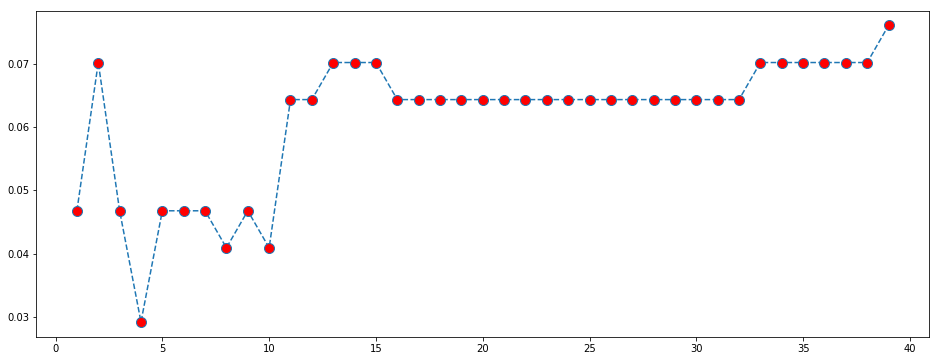

In [54]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40), error_rate, ls = "--", marker = "o", ms = 10, mfc = "red")

### The elbow method improves the model in all ares of the metrics. 

In [56]:
NN = KNeighborsClassifier(n_neighbors=4)
NN.fit(X_train2,y_train2)
preed = NN.predict(X_test2)
print(classification_report(y_test2, preed))
print("\n")
print(confusion_matrix(y_test2,preed))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



[[ 63   3]
 [  2 103]]
